# Generate Start Data

In the absense of having data on hand I will have to generate a bunch of fake data.

In [80]:
%pylab --no-import-all
%matplotlib inline
from control.matlab import *

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [90]:
# Assume engine is a 1st order transfer function with 1+s time constant & unity gain.
# "A horse is a sphere if it makes the equations easier"
sys1 = tf([1],[1,1])

In [91]:
crank_speed = 200
idle_speed  = 600

In [92]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)

In [95]:
U = np.zeros(T.shape)
U[(T>60)]=crank_speed
U[(T>70)]=idle_speed

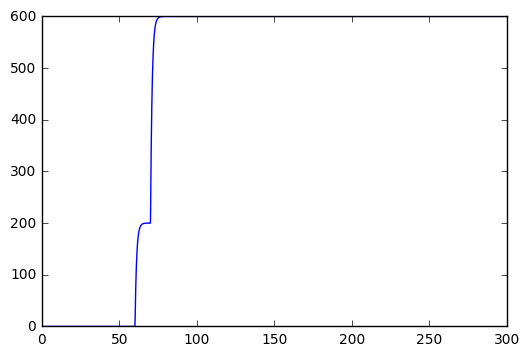

In [96]:
yout, T, xout = lsim(sys1, U=U, T=T)
plt.plot(T,yout)

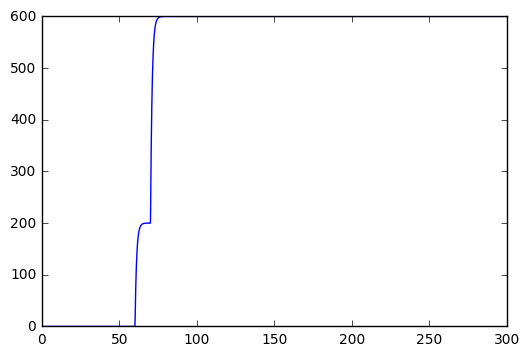

In [97]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)
yout, T, xout = lsim(sys1, U=U, T=T)
plt.plot(T,yout)

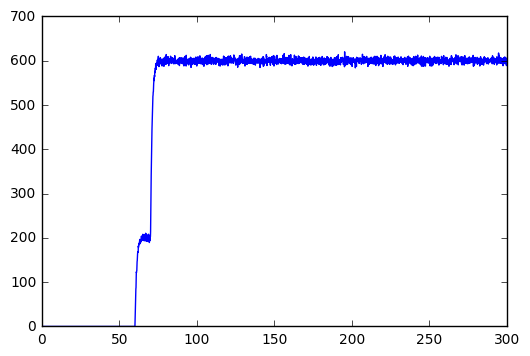

In [107]:
# Add Noise.
yout, T, xout = lsim(sys1, U=U, T=T)
N = np.random.normal(0, 5, yout.shape)
yout[U>0]+=N[U>0]
plt.plot(T,yout)

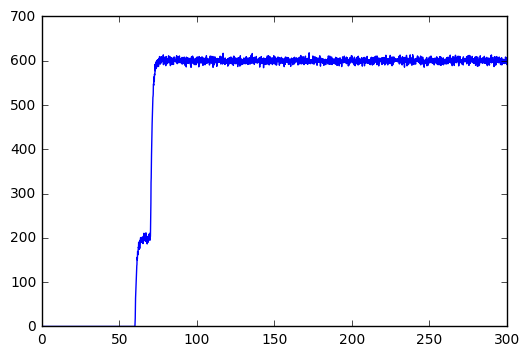

In [146]:
# All together.

# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 5*60
T = np.arange(t0, tfinal+dt, dt)
yout, T, xout = lsim(sys1, U=U, T=T)

N = np.random.normal(0, 5, yout.shape)
yout[U>0]+=N[U>0]

# fig = plt.figure(figsize=(1,1), dpi=32)
plt.plot(T,yout)
# plt.axis('off')

In [147]:
def good_start(T):
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>60)]=crank_speed
    U[(T>70)]=idle_speed

    yout, T, xout = lsim(sys1, U=U, T=T)
    N = np.random.normal(0, 5, yout.shape)
    yout[U>0]+=N[U>0]
    return yout

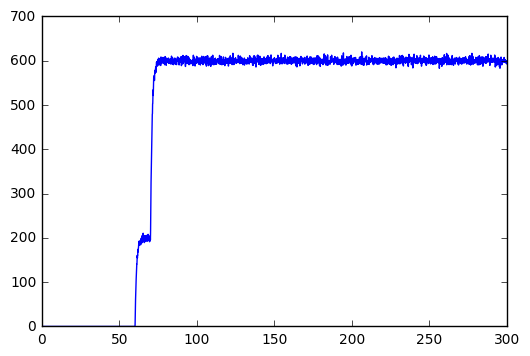

In [148]:
yout = good_start(T)
plt.plot(T,yout)

Sometimes the engine does not start. Out of fuel. Spark plugs unhooked.

Make a no-start plot.

In [153]:
np.random.uniform(-5, 5) 

-3.376171929991658

In [154]:
def no_start(T):
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>60)]=crank_speed
    U[(T>70)]=0
    yout, T, xout = lsim(sys1, U=U, T=T)
    return yout

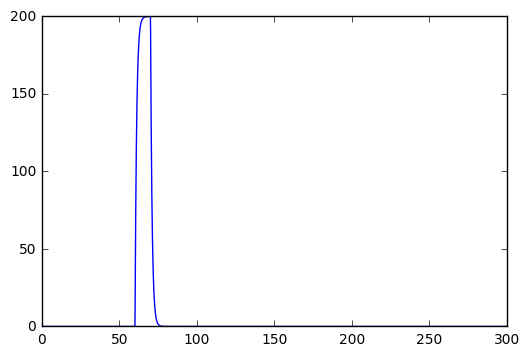

In [155]:
yout = no_start(T)
plt.plot(T,yout)